In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *

In [2]:
# CCAT-prime
zmin = 3.5
zmax = 8.1

Omega_field = 8 * (np.pi/180)**2 #rad^2
Pei = 2.3e4 #Mpc^3 kJy^2 /sr^2 
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

[]

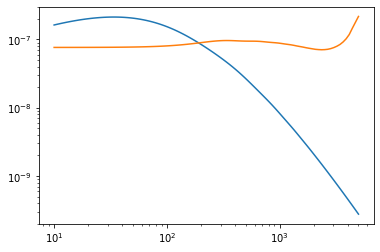

In [3]:
# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)

    
plt.plot(ells, ClKK)
plt.plot(ells, f_N0(ells))
plt.loglog()

In [4]:
# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_KLIM   = get_f_KI()
f_Kkappa = get_f_Kkappa()

f_KLIM_windowed = apply_window_tanh(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

old_f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

I_kappa = d_delta_integral(f_KLIM_windowed, f_Kkappa) #[kJy / sr ] [Mpc]
I_kappa_old = d_delta_integral(old_f_KLIM_windowed, f_Kkappa) #[kJy / sr ] [Mpc]

In [5]:
def tmp_plot_chi_ell(asdf):
    vminmax = np.max(np.abs(asdf))
    plt.figure(figsize=(3,3), dpi=300, facecolor='w',)


    log_ymin = np.log10(ells[0])
    log_ymax = np.log10(ells[-1])

    # plot data
    im = plt.imshow(asdf, 
               origin='lower',
              cmap = 'seismic',
              vmin = -vminmax,
              vmax =  vminmax,
               aspect = 'auto',
              extent=[chibs[0], chibs[-1], log_ymin, log_ymax])

    cbar = plt.colorbar(im, ticks=[-6e-8, -3e-8,0,3e-8,6e-8])
    cbar.ax.set_ylabel('Linear Scale')
    plt.xlabel(r'$\chi$')
    plt.ylabel(r"$\log_{10}(\ell)$")
    plt.show()


/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


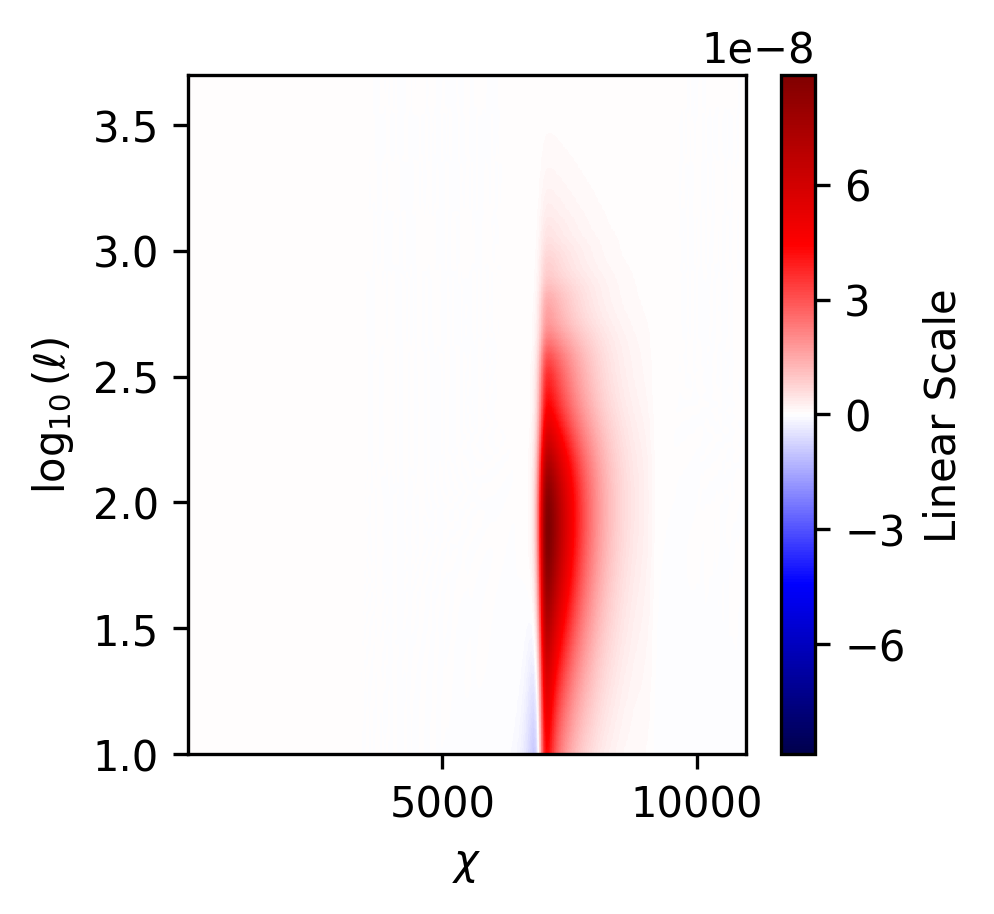

In [6]:
tmp_plot_chi_ell(I_kappa)

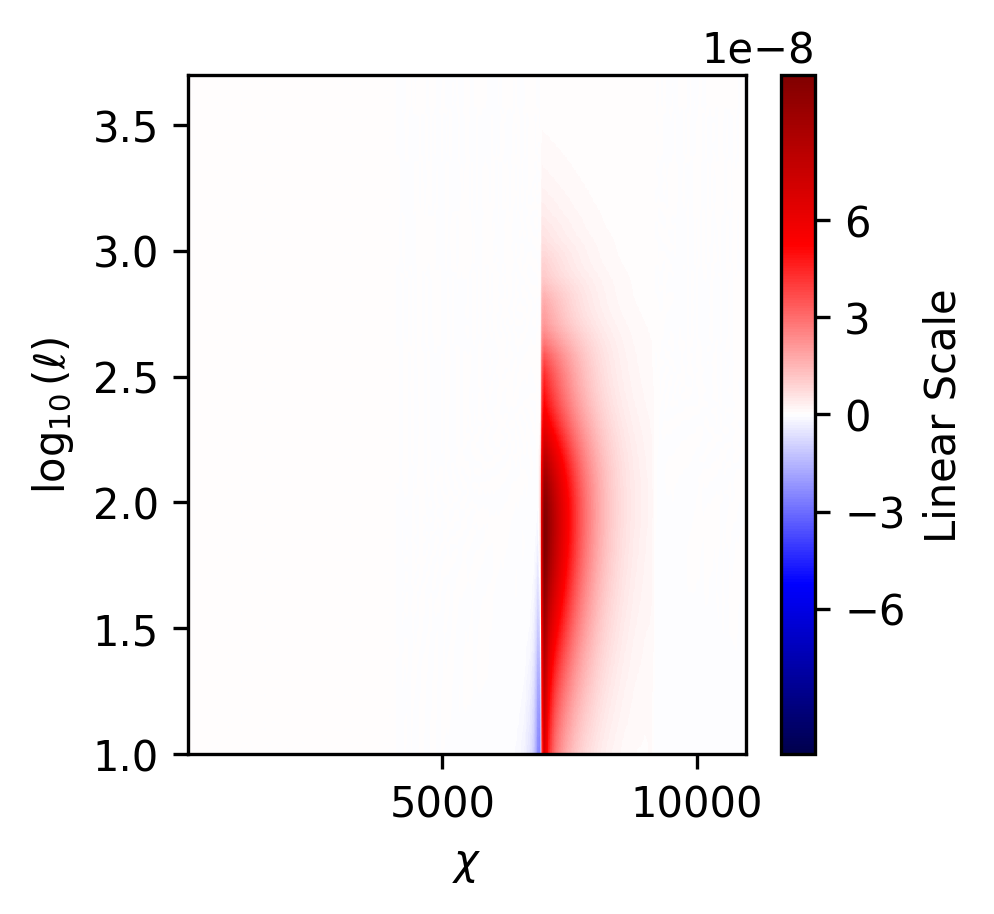

In [7]:
tmp_plot_chi_ell(I_kappa_old)

In [8]:
from scipy.integrate import trapezoid, simpson, quad_vec
from scipy.interpolate import interp1d


In [9]:
Lambdas = np.logspace(-5, -2, 10)

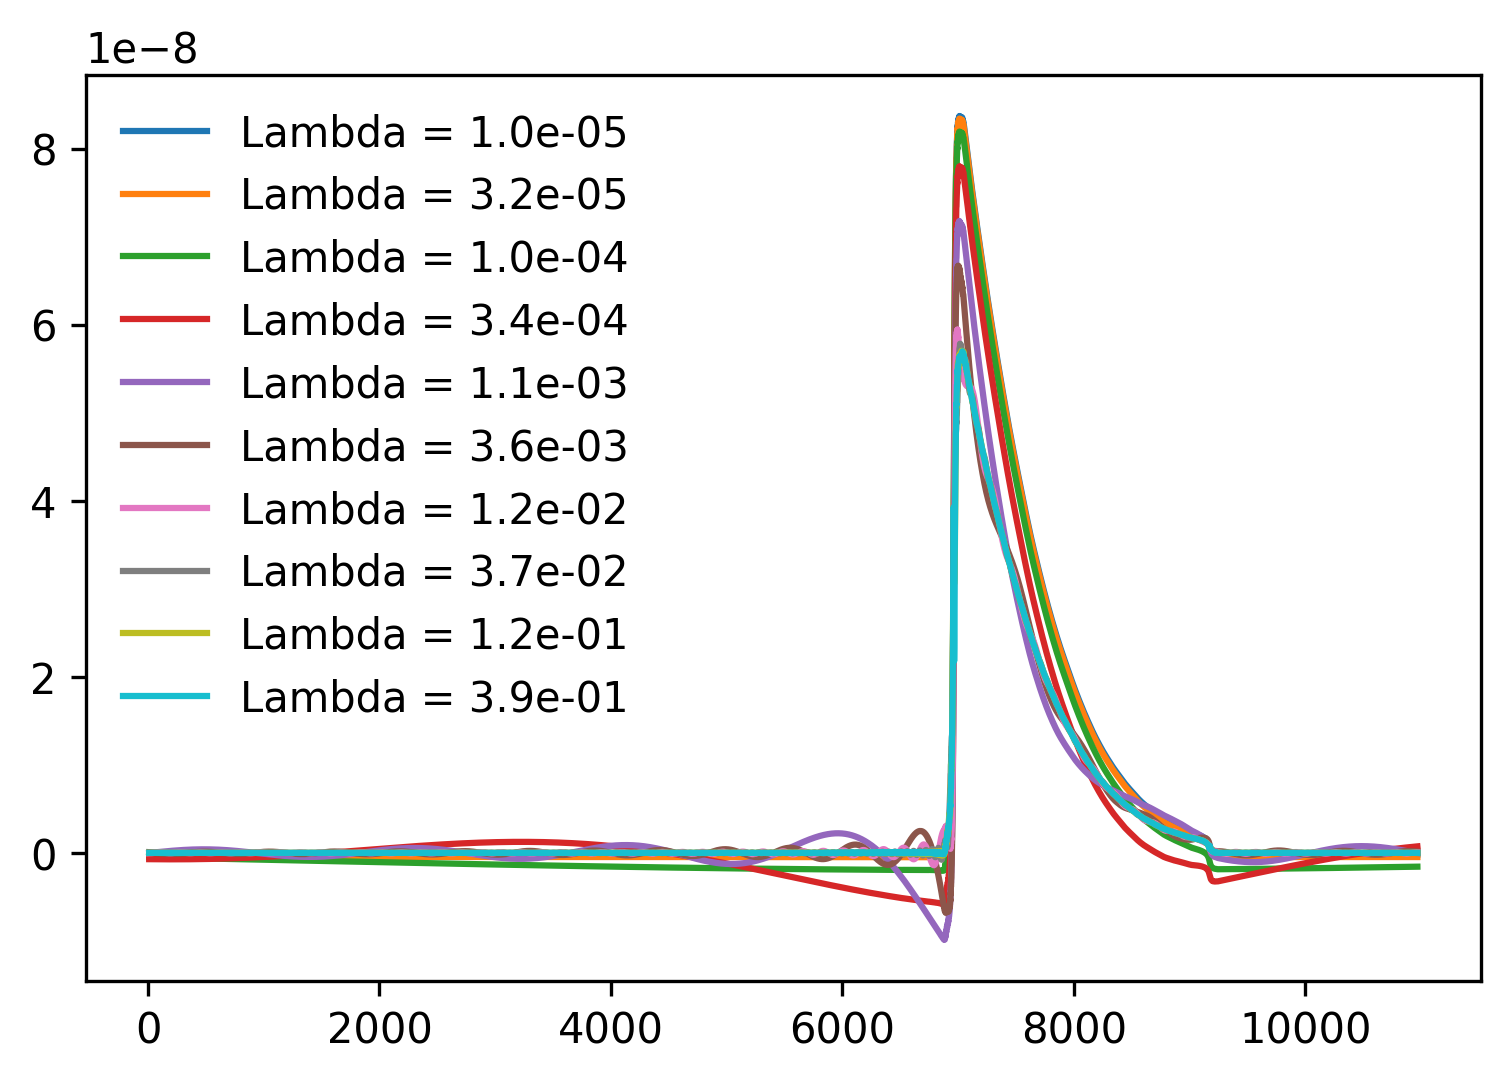

In [10]:
i = -1
plt.figure(dpi = 300)
old_chis = np.linspace(10, chimax_sample, 2**13)
for Lambda in np.logspace(-5, 0, 50):
    i+= 1
    if(i%5 != 0 ):
        continue
    
    IHi_kappa_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/zmin_%.5f_zmax_%.5f_Lambda_%.5f_chi_sample_2e%d.npy'%(zmin, zmax, Lambda,13)
    IHi_kappa = np.load(IHi_kappa_fname) #[kJy/sr Mpc]

    plt.plot(old_chis, IHi_kappa[42], label='Lambda = %.1e'%(Lambda))
    
plt.legend(frameon=False)
plt.show()

/scratch/users/delon/LIMxCMBL/IHiKappa_tanh/zmin_3.50000_zmax_8.10000_Lambda_0.00001_chi_sample_2e8.npy
/scratch/users/delon/LIMxCMBL/IHiKappa_tanh/zmin_3.50000_zmax_8.10000_Lambda_0.00002_chi_sample_2e8.npy
/scratch/users/delon/LIMxCMBL/IHiKappa_tanh/zmin_3.50000_zmax_8.10000_Lambda_0.00005_chi_sample_2e8.npy
/scratch/users/delon/LIMxCMBL/IHiKappa_tanh/zmin_3.50000_zmax_8.10000_Lambda_0.00010_chi_sample_2e8.npy
/scratch/users/delon/LIMxCMBL/IHiKappa_tanh/zmin_3.50000_zmax_8.10000_Lambda_0.00022_chi_sample_2e8.npy
/scratch/users/delon/LIMxCMBL/IHiKappa_tanh/zmin_3.50000_zmax_8.10000_Lambda_0.00046_chi_sample_2e8.npy
/scratch/users/delon/LIMxCMBL/IHiKappa_tanh/zmin_3.50000_zmax_8.10000_Lambda_0.00100_chi_sample_2e8.npy
/scratch/users/delon/LIMxCMBL/IHiKappa_tanh/zmin_3.50000_zmax_8.10000_Lambda_0.00215_chi_sample_2e8.npy
/scratch/users/delon/LIMxCMBL/IHiKappa_tanh/zmin_3.50000_zmax_8.10000_Lambda_0.00464_chi_sample_2e8.npy
/scratch/users/delon/LIMxCMBL/IHiKappa_tanh/zmin_3.50000_zmax_8.

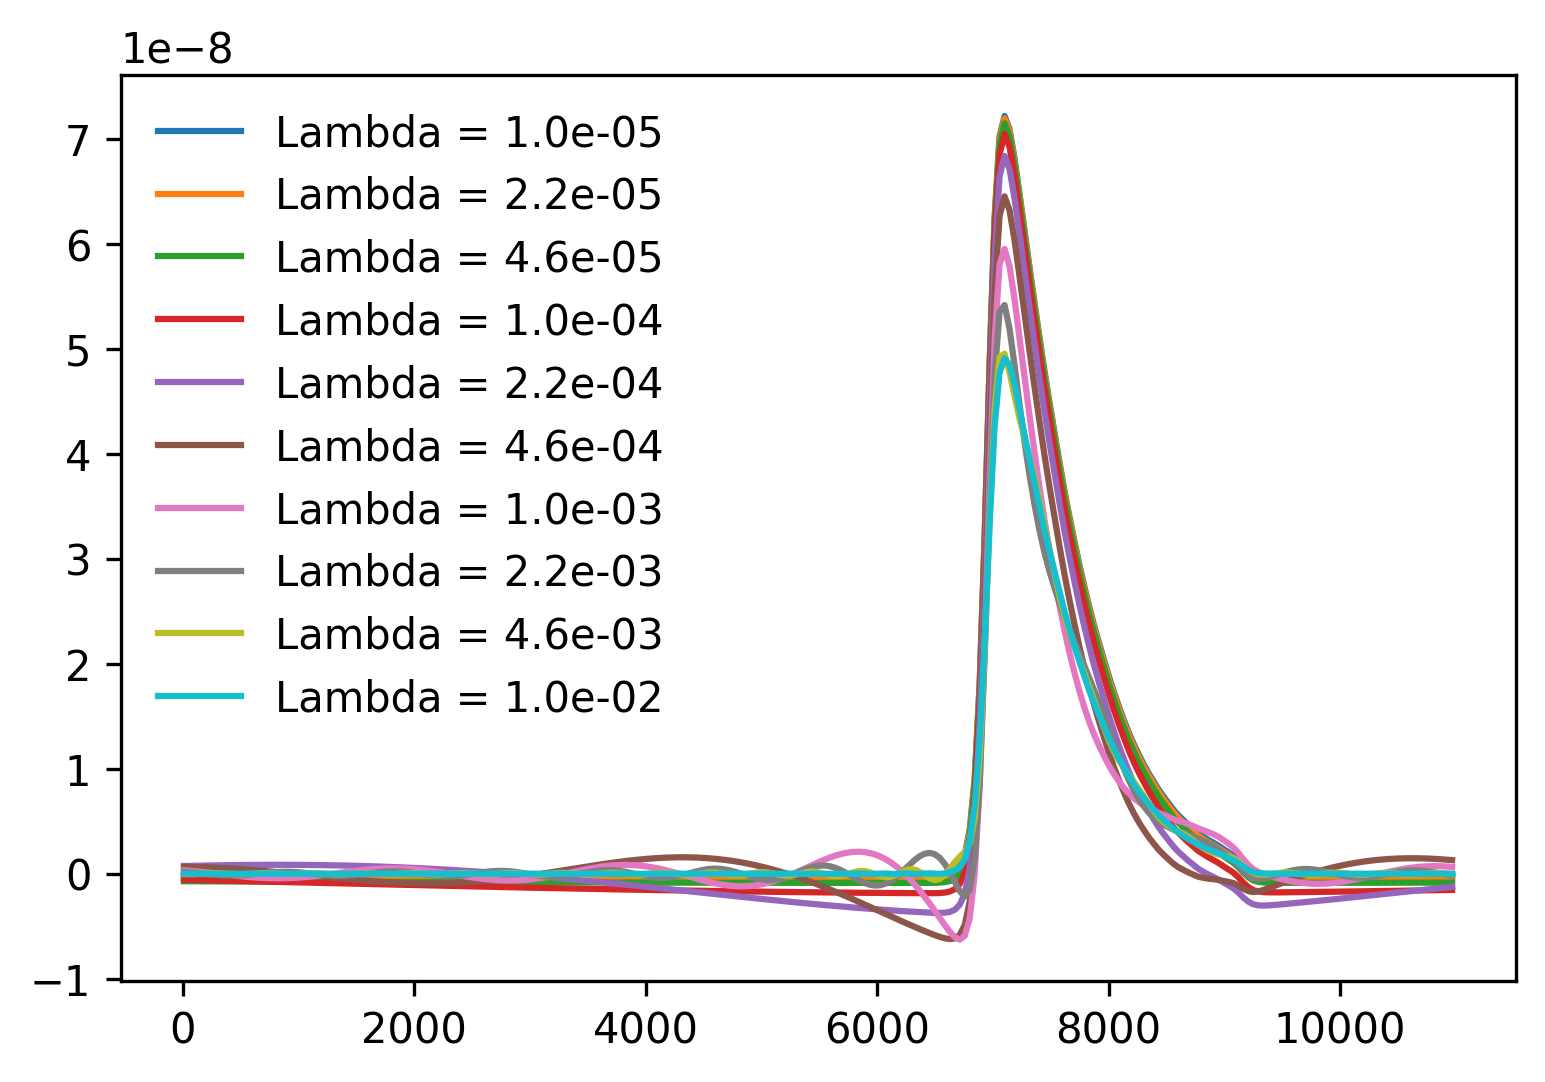

In [12]:
i = -1
plt.figure(dpi = 300)
for Lambda in Lambdas:   
#     i+= 1
#     if(i%5 != 0 ):
#         continue

    IHi_kappa_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa_tanh/zmin_%.5f_zmax_%.5f_Lambda_%.5f_chi_sample_2e%d.npy'%(zmin, zmax, Lambda,8)
    print(IHi_kappa_fname)
    IHi_kappa = np.load(IHi_kappa_fname) #[kJy/sr Mpc]

    plt.plot(chis_resample, IHi_kappa[42], label='Lambda = %.1e'%(Lambda))
    
plt.legend(frameon=False)
plt.show()

In [13]:
from tqdm import trange, tqdm

In [14]:
window = np.where((chis_resample > chimin) & (chis_resample < chimax))[0]

In [15]:
chis_resample_len = int(np.log2(len(chis_resample)))
print(chis_resample_len)

8


In [16]:
SNR2_per_mode = {}
SNR2_per_mode_full = {}
SNR2_per_mode_sanity = {}

integrand =  I_kappa**2 / (1/chis_resample**2)
SNR2_per_mode[0.0] = trapezoid(x = chis_resample, y = integrand)/(ClKK + f_N0(ells)) 
SNR2_per_mode_full[0.0] = SNR2_per_mode[0.0]
SNR2_per_mode_sanity[0.0] = SNR2_per_mode[0.0]

for Lambda in tqdm(Lambdas):
#     print(Lambda)
    chis_resample_len = int(np.log2(len(chis_resample)))
    IHi_kappa_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa_tanh/zmin_%.5f_zmax_%.5f_Lambda_%.5f_chi_sample_2e%d.npy'%(zmin, zmax, Lambda,chis_resample_len)
    IHi_kappa = np.load(IHi_kappa_fname) #[kJy/sr Mpc]

    integrand =  IHi_kappa**2 / (1/chis_resample**2) # [kJy^2/sr^2][Mpc^4]
    
    # total integral has unit #[kJy^2 / sr^2][Mpc^3] 
    SNR2_per_mode[Lambda] = simpson(x = chis_resample[window], 
                                    y = integrand[:,window])/(ClKK + f_N0(ells)) 
    

    eIeI, eLOeLO, eIeLO, eLOeI = get_eHIeHI(chimin, chimax, Lambda)
    eHIeHI = eIeI + eLOeLO - eIeLO - eLOeI
    
    IHi_kappa_windowed = IHi_kappa[:, window].astype(np.float64)
    intermediate = np.linalg.solve(eHIeHI, IHi_kappa_windowed.T)
    SNR2_per_mode_full[Lambda] = np.einsum('ij, ji->i',IHi_kappa_windowed, intermediate)/ (ClKK + f_N0(ells))

    intermediate = np.linalg.solve(eIeI, IHi_kappa_windowed.T)
    SNR2_per_mode_sanity[Lambda] = np.einsum('ij, ji->i',IHi_kappa_windowed, intermediate)/ (ClKK + f_N0(ells))


100%|██████████| 10/10 [00:00<00:00, 87.21it/s]


In [17]:
Lambdas = np.array(sorted(list(SNR2_per_mode.keys())))

In [18]:
rainbow_colors = plt.cm.rainbow(np.linspace(0, 1, len(SNR2_per_mode)))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=rainbow_colors[::-1])

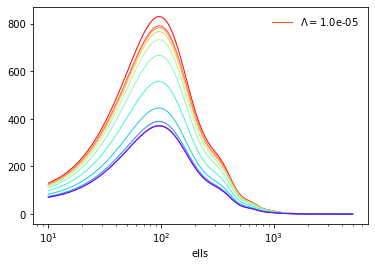

In [19]:
plt.figure(facecolor = 'w')
for Lambda in SNR2_per_mode:
    label = None
    if(Lambda == 1e-5 or Lambda == 1e0):
        label = r'$\Lambda=$%.1e'%(Lambda)
    plt.plot(ells, SNR2_per_mode[Lambda], label=label, lw = 1)
plt.xscale('log')
plt.xlabel('ells')
plt.legend(frameon=False)

Text(0.5, 0, 'ells')

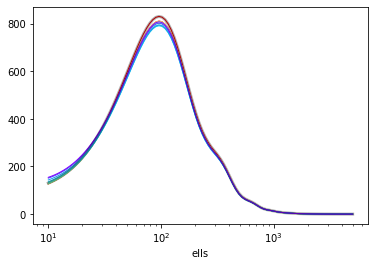

In [20]:
plt.figure(facecolor = 'w')
for Lambda in SNR2_per_mode_sanity:
    label = r'$\Lambda=$%.1e'%(Lambda)
    label = None
    plt.plot(ells, SNR2_per_mode_full[Lambda], label=label, lw = 1)
    
plt.plot(ells, SNR2_per_mode[0.0], label=label, lw = 3, c='k', alpha = 0.3)
plt.xscale('log')
plt.xlabel('ells')

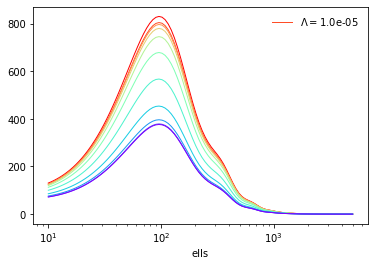

In [21]:
plt.figure(facecolor = 'w')
for Lambda in SNR2_per_mode:
    label = None
    if(Lambda == 1e-5 or Lambda == 1e0):
        label = r'$\Lambda=$%.1e'%(Lambda)
    plt.plot(ells, SNR2_per_mode_sanity[Lambda], label=label, lw = 1)
plt.xscale('log')
plt.xlabel('ells')
plt.legend(frameon=False)

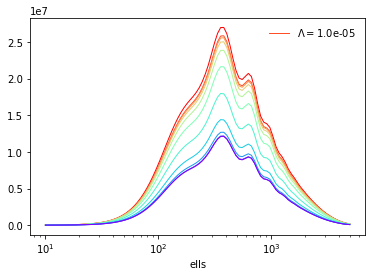

In [22]:
plt.figure(facecolor = 'w')
for Lambda in SNR2_per_mode:
    label = None
    if(Lambda == 1e-5 or Lambda == 1e0):
        label = r'$\Lambda=$%.1e'%(Lambda)
    plt.plot(ells, ells**2 * SNR2_per_mode[Lambda], label=label, lw = 1)

plt.xscale('log')
plt.xlabel('ells')
plt.legend(frameon=False)

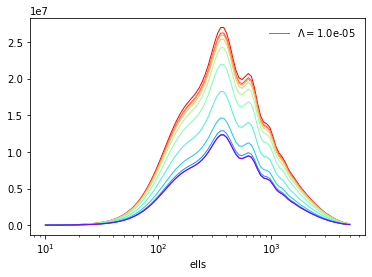

In [23]:
plt.figure(facecolor = 'w')
for Lambda in SNR2_per_mode:
    label = None
    if(Lambda == 1e-5 or Lambda == 1e0):
        label = r'$\Lambda=$%.1e'%(Lambda)
    plt.plot(ells, ells**2 * SNR2_per_mode_sanity[Lambda], label=label, lw = 1)

plt.xscale('log')
plt.xlabel('ells')
plt.legend(frameon=False)

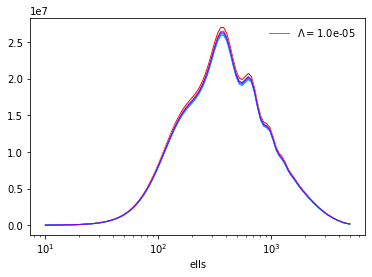

In [24]:
plt.figure(facecolor = 'w')
for Lambda in SNR2_per_mode:
    label = None
    if(Lambda == 1e-5 or Lambda == 1e0):
        label = r'$\Lambda=$%.1e'%(Lambda)
    plt.plot(ells, ells**2 * SNR2_per_mode_full[Lambda], label=label, lw = 1)

plt.xscale('log')
plt.xlabel('ells')
plt.legend(frameon=False)

In [25]:
plt.show()
plt.rcParams['text.usetex'] = True

In [26]:
SNR2_per_Omega_per_invPei = np.zeros_like(Lambdas)
SNR2_per_Omega_per_invPei_full = np.zeros_like(Lambdas)
SNR2_per_Omega_per_invPei_sanity = np.zeros_like(Lambdas)

for Lambda_idx in range(len(Lambdas)):
    Lambda = Lambdas[Lambda_idx]
    #[kJy^2 / sr^2][Mpc^3] \times 1/angle^2
    summand = SNR2_per_mode[Lambda] * ells ** 2 
    
    # [kJy^2 / sr^2][Mpc^3] \times 1/angle^2
    SNR2_per_Omega_per_invPei[Lambda_idx] = trapezoid(x = np.log(ells), 
                                           y = SNR2_per_mode[Lambda] * ells ** 2 / 2 / np.pi)
    SNR2_per_Omega_per_invPei_full[Lambda_idx] = trapezoid(x = np.log(ells), 
                                           y = SNR2_per_mode_full[Lambda] * ells ** 2 / 2 / np.pi)
    
    SNR2_per_Omega_per_invPei_sanity[Lambda_idx] = trapezoid(x = np.log(ells), 
                                       y = SNR2_per_mode_sanity[Lambda] * ells ** 2 / 2 / np.pi)

Text(0, 0.5, '$${\\sf SNR}^2 \\times \\frac 1 {{\\Omega}\\ [\\sf rad^2]}\\times {P^{\\epsilon_I}}\\left[\\sf Mpc^{3}\\frac{\\sf kJy^2}{\\sf sr^2} \\right]$$')

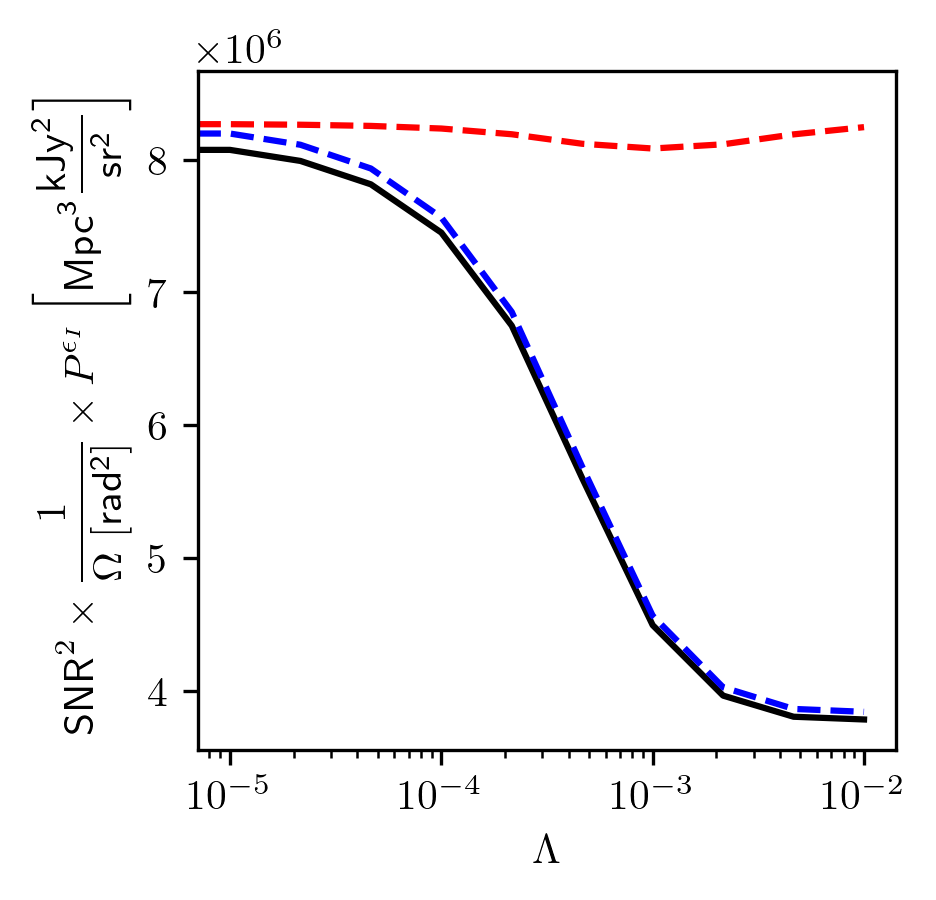

In [27]:
plt.figure(figsize = (3,3) ,dpi = 300, facecolor = 'w')

plt.plot(Lambdas, (SNR2_per_Omega_per_invPei), c='k')
plt.plot(Lambdas, (SNR2_per_Omega_per_invPei_full), 'r--')
plt.plot(Lambdas, (SNR2_per_Omega_per_invPei_sanity), 'b--')

plt.xscale('log')
fundamental = 2*np.pi/(chimax - chimin)

plt.xlabel(r'$\Lambda$')
plt.ylabel(r'$${\sf SNR}^2 \times \frac 1 {{\Omega}\ [\sf rad^2]}\times {P^{\epsilon_I}}\left[\sf Mpc^{3}\frac{\sf kJy^2}{\sf sr^2} \right]$$')

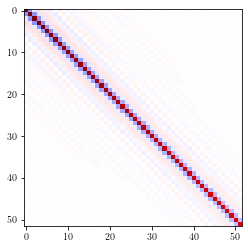

In [28]:
vminmax = np.max(np.abs(eHIeHI))
plt.imshow(eHIeHI, vmin = -vminmax, vmax = vminmax, cmap = 'seismic')

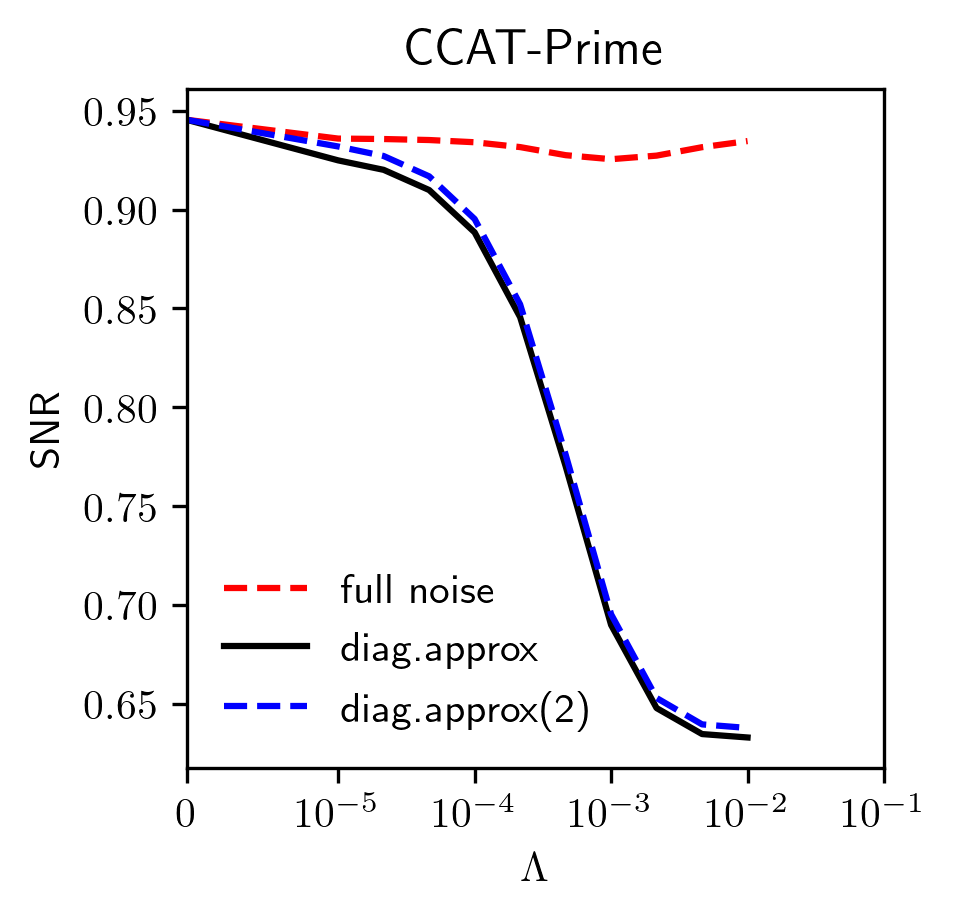

In [29]:
plt.figure(figsize = (3,3) ,dpi = 300, facecolor = 'w')

plt.plot(Lambdas, 
         np.sqrt(SNR2_per_Omega_per_invPei_full) * np.sqrt(Omega_field) / np.sqrt(Pei), 
         'r--',
        label='full noise')

plt.plot(Lambdas, 
         np.sqrt(SNR2_per_Omega_per_invPei) * np.sqrt(Omega_field) / np.sqrt(Pei), 
         c='k',
        label='diag.approx')

plt.plot(Lambdas, 
         np.sqrt(SNR2_per_Omega_per_invPei_sanity) * np.sqrt(Omega_field) / np.sqrt(Pei), 
         'b--',
        label='diag.approx(2)')


plt.xscale('symlog', linthresh = 1e-5)
fundamental = 2*np.pi/(chimax - chimin)

plt.xlim(0, 1e-1)
plt.xlabel(r'$\Lambda$')
plt.ylabel(r'$${\sf SNR}$$')
plt.title('CCAT-Prime')
plt.legend(frameon=False)